In [156]:
library(parsedate)

Read the stats from the CSV file, prevent quotes to interfere

In [157]:
data <- read.csv("stats.csv", stringsAsFactors=FALSE, sep=",", quote="")

Use reshape/melt to conver the data into a form better suited for plotting using ggplot

In [158]:
library("reshape2")
datam <- melt(data, id.vars="Date", measure.vars=c("Open.overall","Actual.bugs","Enhancements",
                                                   "Needinfo","Workable.bugs","Bugs.with.patch"))

Plot the results

In [159]:
library(ggplot2)

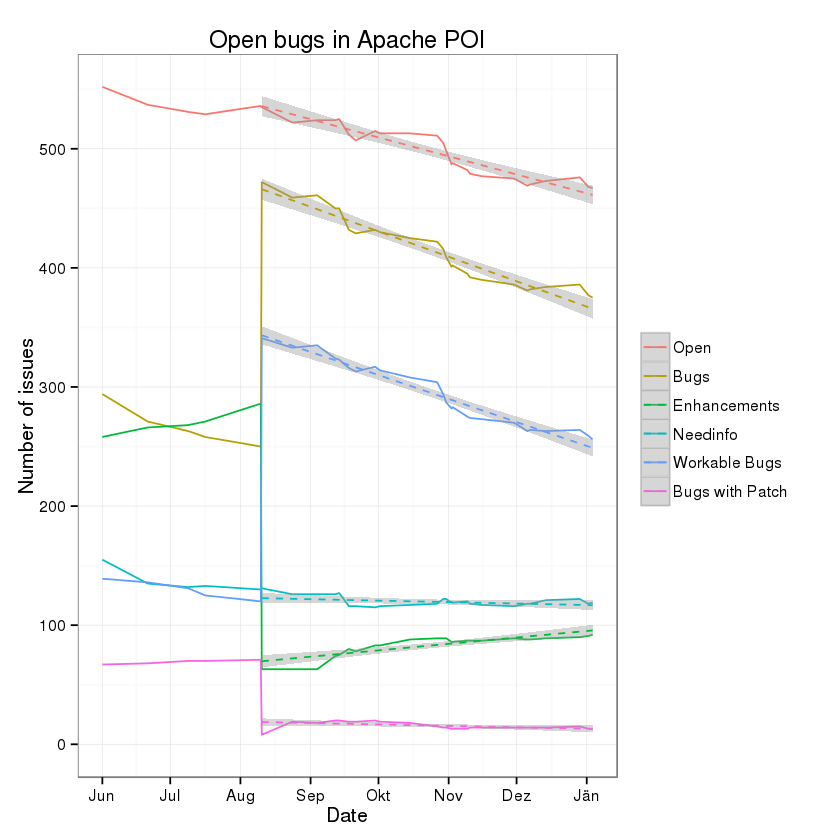

In [160]:
ggplot(datam, aes(x=parse_date(Date, approx = TRUE), y=value, colour=variable)) +
    geom_line() +
    # add fitted regression lines
    geom_smooth(data=subset(datam, parse_date(Date, approx = TRUE) >= parse_date("2015-08-10 10:21")), 
                            method="lm", level=0.99, linetype="dashed") +
    # pin the y-axis at zero
    expand_limits(y=0) +
    # start after the change in how we compute the values, it's actually at 2015-08-10 10:21
    #xlim(parse_date("2015-08-19 00:00"), max(parse_date(datam$Date, approx = TRUE))) +
    # specify the label for both axes
    xlab("Date") +
    ylab("Number of issues") +
    # add more ticks on the y-axis
    scale_y_continuous(breaks=seq(0,1000,by=100)) +
    # set a title for the graph
    ggtitle("Open bugs in Apache POI") + 
    # set the default black/white theme
    theme_bw() +
    # legend styling
    theme(legend.position="right",
          legend.key = element_rect(fill = "white")) +
    scale_colour_discrete(labels=c("Open","Bugs","Enhancements",
                                    "Needinfo","Workable Bugs","Bugs with Patch")) +
    guides(colour=guide_legend(title=NULL))

In [161]:
ggsave("stats.svg", width=210, height=148, units="mm")

# Below is dumpheap

In [162]:
?element_rect

element_rect {ggplot2},R Documentation
fill,fill colour
colour,border colour
size,border size
linetype,border linetype
color,an alias for colour


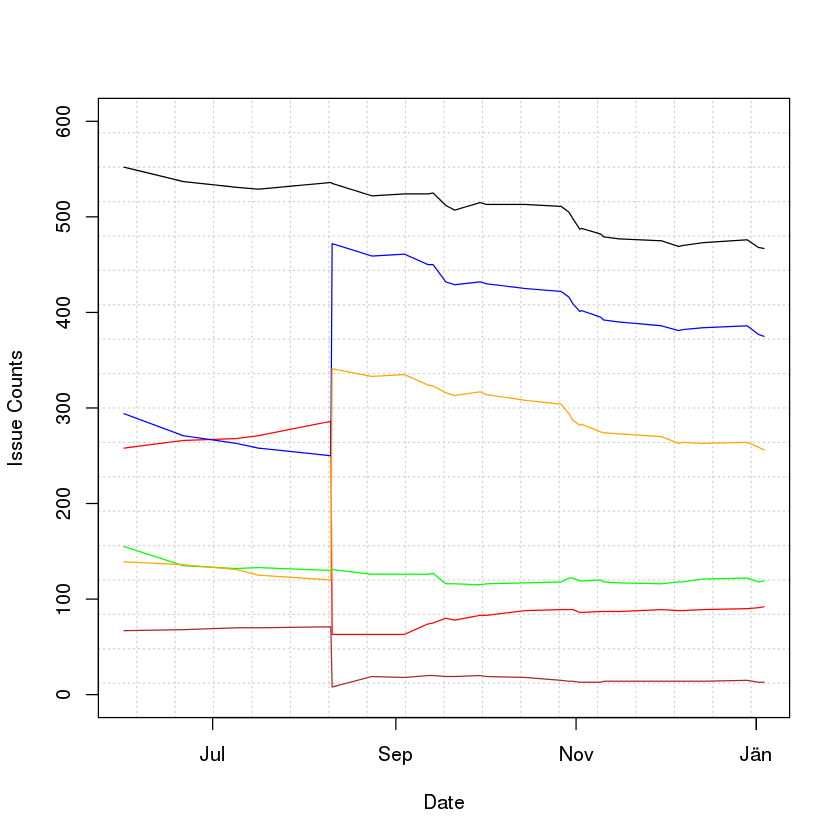

In [163]:
plot(parse_date(data$Date, approx = TRUE), data$Open.overall, type="l", 
    ylim=c(0, 600), panel.first = grid(18, 18), xlab="Date", ylab="Issue Counts")
lines(parse_date(data$Date, approx = TRUE), data$Enhancements, col="red")
lines(parse_date(data$Date, approx = TRUE), data$Actual.bugs, col="blue")
lines(parse_date(data$Date, approx = TRUE), data$Needinfo, col="green")
lines(parse_date(data$Date, approx = TRUE), data$Workable.bugs, col="orange")
lines(parse_date(data$Date, approx = TRUE), data$Bugs.with.patch, col="brown")

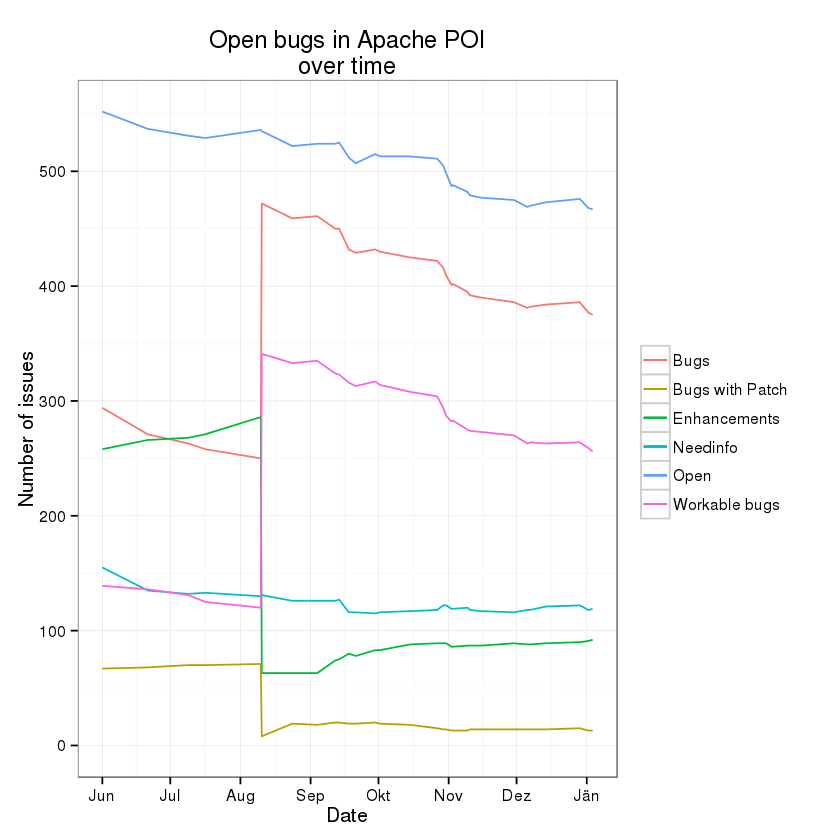

In [164]:
ggplot(data, aes(parse_date(Date, approx = TRUE))) +
    # add the various lines
    geom_line(aes(y=Actual.bugs, colour="Bugs")) + 
    geom_line(aes(y=Open.overall, colour="Open")) + 
    geom_line(aes(y=Enhancements, colour="Enhancements")) + 
    geom_line(aes(y=Needinfo, colour="Needinfo")) + 
    geom_line(aes(y=Workable.bugs, colour="Workable bugs")) + 
    geom_line(aes(y=Bugs.with.patch, colour="Bugs with Patch")) + 
    # pin the y-axis at zero
    expand_limits(y=0) +
    # specify the label for both axes
    xlab("Date") +
    ylab("Number of issues") +
    # add more ticks on the y-axis
    scale_y_continuous(breaks=seq(0,1000,by=100)) +
    # set a title for the graph
    ggtitle("Open bugs in Apache POI\nover time") + 
    # set the default black/white theme
    theme_bw() +
    # legend styling
    theme(legend.position="right") +
    #labs(colour="Legend")
    guides(colour=guide_legend(title=NULL))

In [165]:
dataf <- data
dataf$Date <- factor(dataf$Date)

In [167]:
str(data)

'data.frame':	34 obs. of  13 variables:
 $ Date             : chr  "2015-05-31 23:44" "2015-06-20 23:59" "2015-07-08 21:49" "2015-07-16 11:25" ...
 $ Timestamp        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Bugs.overall     : int  3362 3380 3398 3403 3431 3431 3443 3448 3461 3463 ...
 $ Open.overall     : int  552 537 531 529 536 535 522 524 524 525 ...
 $ Enhancements     : int  258 266 268 271 286 63 63 63 74 75 ...
 $ Actual.bugs      : int  294 271 263 258 250 472 459 461 450 450 ...
 $ Needinfo         : int  155 135 132 133 130 131 126 126 126 127 ...
 $ Workable.bugs    : int  139 136 131 125 120 341 333 335 324 323 ...
 $ Bugs.with.patch  : int  67 68 70 70 71 8 19 18 20 20 ...
 $ Opened.last.week : int  0 0 5 5 13 12 7 4 11 11 ...
 $ Changed.last.week: int  0 0 19 16 25 24 28 17 34 27 ...
 $ Closed.last.week : int  0 0 11 7 10 9 20 4 15 12 ...
 $ Distribution     : chr  "{}" "{}" "{}" "{}" ...


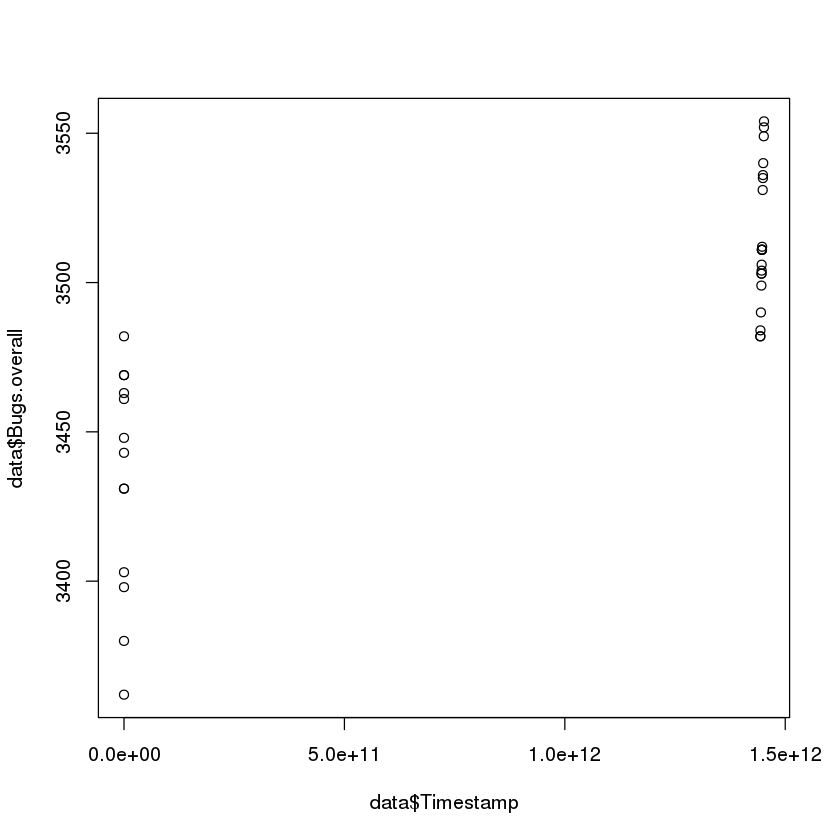

In [168]:
plot(data$Timestamp, data$Bugs.overall)

In [169]:
parse_date(data$Date, approx = TRUE)

 [1] "2015-05-31 23:44:00 UTC" "2015-06-20 23:59:00 UTC"
 [3] "2015-07-08 21:49:00 UTC" "2015-07-16 11:25:00 UTC"
 [5] "2015-08-09 23:56:00 UTC" "2015-08-10 10:21:00 UTC"
 [7] "2015-08-23 21:46:00 UTC" "2015-09-03 21:29:00 UTC"
 [9] "2015-09-11 21:26:00 UTC" "2015-09-13 14:40:00 UTC"
[11] "2015-09-17 21:24:00 UTC" "2015-09-20 22:17:00 UTC"
[13] "2015-09-29 12:35:00 UTC" "2015-09-29 12:46:00 UTC"
[15] "2015-09-29 12:47:00 UTC" "2015-10-01 16:07:00 UTC"
[17] "2015-10-14 21:28:00 UTC" "2015-10-26 22:14:00 UTC"
[19] "2015-10-29 13:48:00 UTC" "2015-10-30 22:36:00 UTC"
[21] "2015-11-02 06:26:00 UTC" "2015-11-02 19:16:00 UTC"
[23] "2015-11-09 08:20:00 UTC" "2015-11-10 09:23:00 UTC"
[25] "2015-11-10 14:37:00 UTC" "2015-11-10 14:39:00 UTC"
[27] "2015-11-15 12:31:00 UTC" "2015-11-29 21:24:00 UTC"
[29] "2015-12-05 17:42:00 UTC" "2015-12-06 22:55:00 UTC"
[31] "2015-12-13 21:39:00 UTC" "2015-12-28 22:01:00 UTC"
[33] "2016-01-01 17:33:00 UTC" "2016-01-03 14:31:00 UTC"

In [170]:
library(ggplot2)

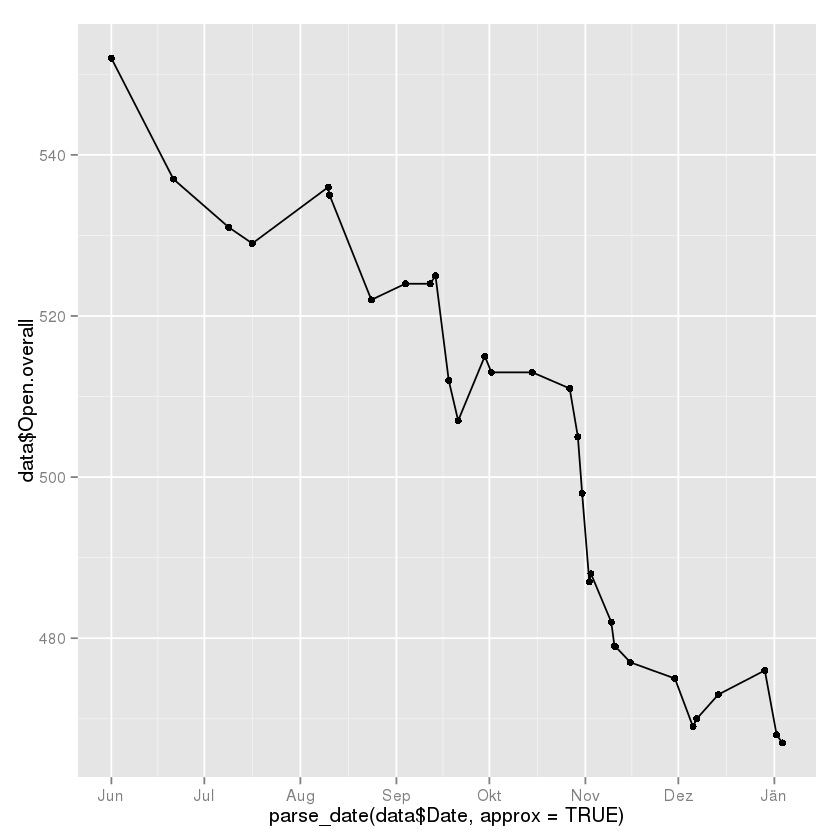

In [171]:
qplot(x=parse_date(data$Date, approx = TRUE), y=data$Open.overall) + geom_line() + geom_point()